Title: When to Use Vertical Stacked Bar Charts
Slug: when-use-vertical-stacked-bar-charts
Summary: Examples of datasets to illustrate when to use vertical stacked bar charts
Date: 2018-06-11 15:00  
Category: Data Visualizations
Subcategory: Best Practices
PostType: Tutorial
Tags: vertical stacked bar charts
Keywords: when use vertical stacked bar charts
Authors: Dan Friedman

Vertical bar charts are useful to illustrate sizes of data using different bar heights. In each vertical bar, we could show a stack of amounts by a certain category type. This type of chart is a **vertical stacked bar chart**.

For example, let's say we had a service that rented out scooters in San Francisco, California. Customers can make a one-time rental or pay a monthly subscription fee and get unlimited rides for under 30 minutes. So, for each ride, we log if the customer was *individual* or *subscriber*. With these two categories for types of riders, we can see a breakdown of each compared to the monthly count of rides with a vertical stacked bar chart.

### Import Modules

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Example: Scooter Rides Per Month Over Time by Account Type

Let's continue with the example mentioned above. I'm curious about the trend of individual versus subscriber scooter rides over the past year. To get a high-level perspective, I think it would be helpful to look at the count of rides per month for each of these account types.

A sample of our *original* data would look like:

Date | Miles Ridden | Account Type
--- | --- | ---
6/9/2018 | 2.1 | Individual
6/10/2018 | 1.5 | Subscriber
6/10/2018 | 3.9 | Subscriber

We'd like get a count of rides on the monthly level broken out by account type. Therefore, given the data above, we'd perform a group by operation on a month-year field, then group by account type, and then count the number of rides. We'd end up with a sample of data looking like:

Month Year | Count Individual Rides | Count Subscriber Rides
--- | --- | ---
May 2017 | 31100 | 900
June 2017 | 33900 | 1100
July 2017 | 36380 | 1300


#### Generate Monthly Scooter Count Ride Data by Account Type

In [28]:
month_list = [i.strftime("%b %Y") for i in pd.date_range(start='5-2017', end='5-2018', freq='MS')]

In [29]:
monthly_count_rides = [32000, 35000, 37680, 41500, 43300, 44000, 44350, 41000, 39000, 39500, 48000, 50000, 52000]
monthly_count_rides_subscribers = [900, 1100, 1300, 1800, 2860, 3300, 3350, 3480, 4005, 4790, 4980, 5150, 5290]

In [30]:
monthly_count_rides_individual = [month[0]-month[1] for month in zip(monthly_count_rides, monthly_count_rides_subscribers)]

#### Plot Scooter Data

In [31]:
df = pd.DataFrame({'month_year': month_list, 'count_scooter_rides': monthly_count_rides, 
                    'count_scooter_rides_subscription': monthly_count_rides_subscribers,
                   'count_scooter_rides_individual': monthly_count_rides_individual})

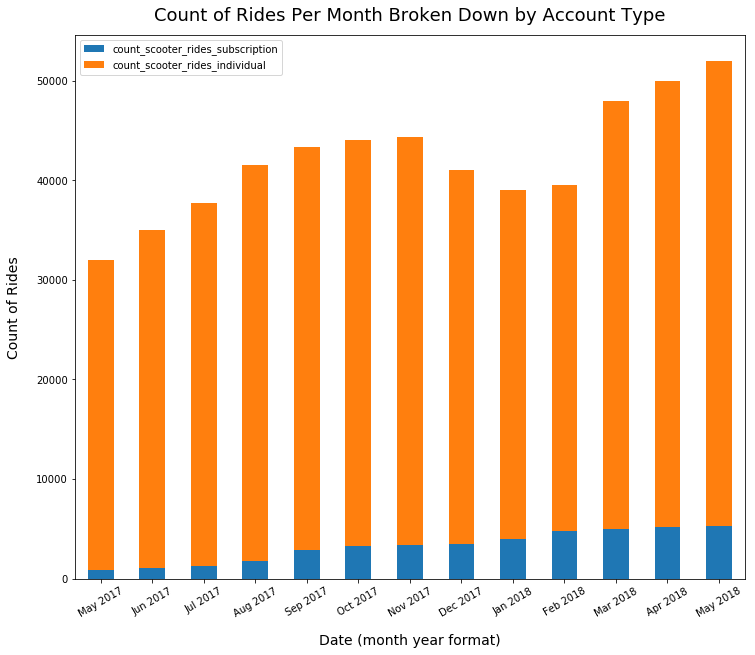

In [38]:
df.set_index('month_year')[['count_scooter_rides_subscription', 'count_scooter_rides_individual']].plot(kind='bar', figsize=(12, 10), stacked=True)
plt.xticks(rotation=30)
plt.title("Count of Rides Per Month Broken Down by Account Type", fontsize=18, y=1.015)
plt.ylabel("Count of Rides", fontsize=14, labelpad=15);
plt.xlabel("Date (month year format)", fontsize=14, labelpad=15)

#### Explanation of Scooter Plot

From a total rides perspective, we can see scooter rides increased greatly month over month from May 2017 to November 2017. However, there was a dip in the winter months, and then a drastic increase in the warmer months of March 2018 onwards.

Looking at the account types, it's there are two account types and they each had a share of rides every month. The far majority of rides were individual account riders, not subscribers. 

### Example: Bike Sales by Bike Type

The example above was a simplified example of a stacked bar chart. Stacked bar charts are often more beneficial for showing the breakdown of greater than two categories.

Let's say we run a bike shop in California. We sell 5 types of bikes: hybrid, mountain, racing, electric and bmx. We'd like to get a high-level view of sales per month over the past year and at a high-level see sales by bike type too.

A sample of the original sales data would be in the format:

Date | Sale Price (U.S. Dollars) | Bike Type
--- | --- | ---
6/9/2018 | 1550 | Electric
6/10/2018 | 1300 | Racing
6/10/2018 | 600 | Hybrid

To get our data in the intended format mentioned above, we'd need to group this data by month-year, then group by bike type, and then aggregate by sum of sale price amounts. 

We'd get data in the format below:


Month Year | Hybrid Sales | Mountain Sales | Racing Sales | Electric Sales | BMX Sales
--- | --- | ---
May 2017 | 75000 | 9000 | 18000 | 13000 | 5400
June 2017 | 76500 | 8500 | 15000 | 14600 | 4000
July 2017 | 66000 | 5350 | 13500 | 15000 | 3500

#### Generate Monthly Bike Sales Data by Bike Type

In [33]:
hybrid_bike_sales = [75000, 76500, 66000, 59000, 51000, 28000, 23500, 42000, 18000, 14000, 38000, 55000, 62000]
mountain_bike_sales = [9000, 8500, 5350, 4800, 3900, 3500, 3100, 6300, 0, 0, 1800, 7800, 8000]
racing_bike_sales = [18000, 15000, 13500, 14000, 12000, 8000, 9000, 15000, 3000, 1400, 7000, 10000, 13000]
electric_bike_sales = [13000, 14600, 15000, 22000, 19800, 7000, 5600, 8200, 1300, 3800, 6600, 7800, 12000]
bmx_bike_sales = [5400, 4000, 3500, 1200, 1500, 0, 0, 2800, 0, 800, 500, 1800, 2300]

#### Plot Bike Sales by Bike Type

In [34]:
df2 = pd.DataFrame({'month-year': month_list, 'hybrid': hybrid_bike_sales, 'mountain': mountain_bike_sales, 'racing': racing_bike_sales,
                  'electric': electric_bike_sales, 'bmx': bmx_bike_sales})

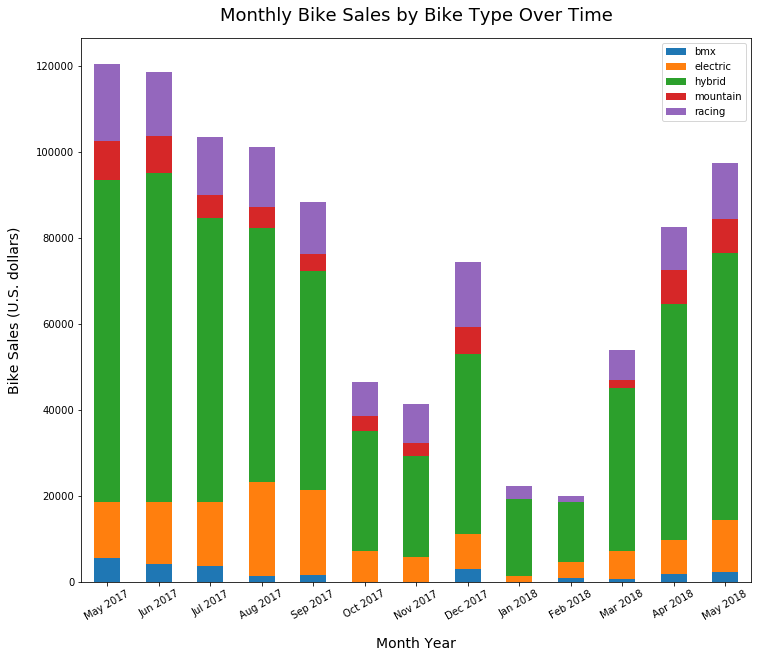

In [40]:
df2.set_index('month-year').plot(kind='bar', stacked=True, figsize=(12, 10))
plt.xticks(rotation=30)
plt.ylabel("Bike Sales (U.S. dollars)", fontsize=14, labelpad=15)
plt.xlabel("Month Year", fontsize=14, labelpad=15)
plt.title("Monthly Bike Sales by Bike Type Over Time", fontsize=18, y=1.02);

#### Explanation of Bike Sales Plot

From a total sales perspective per month, we can see we had very hgih sales in the early spring months of 2017, then a decline month over month heading into November, a small burst in December likely due to holiday sales, and then a steady rise again in the early summer months of 2018. 

We had far more sales in May of 2017 compared to May of 2018. So as a whole, we can infer there may be a potential decline in sales year over year. We'd want more data to show the trend over multiple years to make a firm conclusion on this inference.

Hybrid sales always make up largest portion of bike sales by type.

BMX sales account for the smallest sales by type ever month, and there were only a few bmx bike sales in the winter months.